# Gaussian process information model

Experiments for creating an information model based on Gaussian processes. 

In [2]:
# allow imports from the main source directory
import sys
sys.path.append('..')
import random
import logging
import matplotlib.pyplot as plt
import itertools
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from Environment import EpidemicSpreadEnvironment

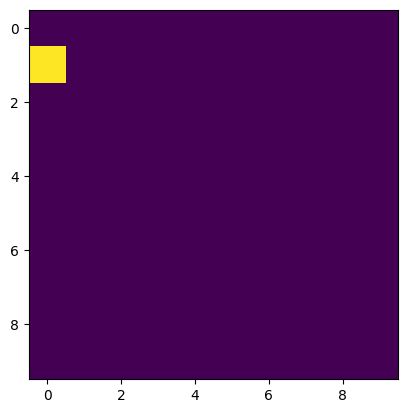

In [3]:
width = 10
height = 10

# environment model
env = EpidemicSpreadEnvironment("water", width, height, seed=0)
env.evolve_speed = 1
env.p_pollution = 0.1
for i in range(200):
    env.proceed(1.0)
plt.imshow(env.value, vmin=0, vmax=1.0)

In [4]:
def samples(n, data):
    """Generates a number of samples. Returns the x and y values, and a map of the samples"""
    X = []
    Y = []
    samplemap = np.zeros([width,height])
    for i in range(n):
        x = random.randint(0, 9)
        y = random.randint(0, 9)
        samplemap[x,y] = 1.0
        v = data[x,y]
        X.append([x,y])
        Y.append([v])
        # trying out what happens if I add it twice
        X.append([x,y])
        Y.append([v])
    return X, Y, samplemap

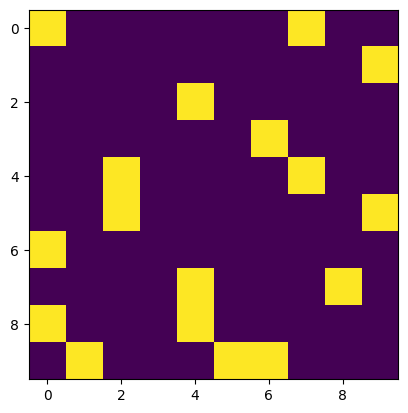

In [5]:
X, Y, samplemap = samples(20, env.value)
plt.imshow(samplemap, vmin=0, vmax=1.0)

In [6]:
rbf = 2.0 * RBF(length_scale = [1.0, 1.0])
gpr = GaussianProcessRegressor(kernel=rbf)
gpr.fit(X,Y)

c:\Users\lboloni\Documents\Code\_VirtualEnvironments\WBF\WBF-venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\lboloni\Documents\Code\_VirtualEnvironments\WBF\WBF-venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\lboloni\Documents\Code\_VirtualEnvironments\WBF\WBF-venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again

GaussianProcessRegressor(kernel=1.41**2 * RBF(length_scale=[1, 1]))

In [9]:
def create_estimate():
    est = np.zeros([width,height])
    stdmap = np.zeros([width,height])
    x = []
    X = np.array(list(itertools.product(range(width), range(height))))
    Y, std = gpr.predict(X, return_std = True)
    for i, idx in enumerate(X):
        est[idx[0], idx[1]] = Y[i]
        stdmap[idx[0], idx[1]] = std[i]
    print(std.sum())
    return est, stdmap

In [10]:
est, stdmap = create_estimate()

0.0001586530486415989


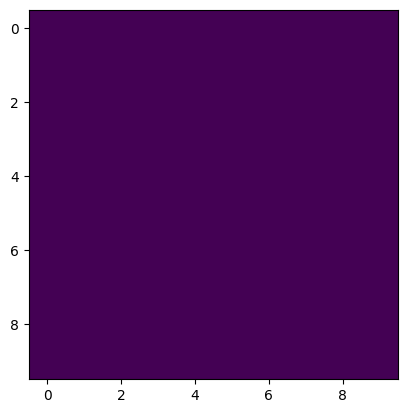

In [11]:
plt.imshow(est, vmin=0, vmax=1.0)
#plt.imshow(stdmap, vmin=0, vmax=1.0)
#plt.imshow(stdmap)

In [12]:
gpr.fit(X,Y)

c:\Users\lboloni\Documents\Code\_VirtualEnvironments\WBF\WBF-venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\lboloni\Documents\Code\_VirtualEnvironments\WBF\WBF-venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\lboloni\Documents\Code\_VirtualEnvironments\WBF\WBF-venv\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again

GaussianProcessRegressor(kernel=1.41**2 * RBF(length_scale=[1, 1]))

In [13]:
x = [[0.5,0]]
ymean, y_cov = gpr.predict(x, return_cov = True)
y_std = np.sqrt(np.diag(y_cov))
#print(f"Prediction = {gpr.predict([[0.5,0]])}  Score = {gpr.predict([[0.5,0]])}" )